# Lab 8: Classification

## Group work by: 
* Rahaf 
* Razan 
* Shahad 
* Fatimah
* Azzah 

### Step 1: Import needed libraries

In [1]:

 # optional import to ignore warnings related to libraries
import warnings
# numpy library is needed to perform mathematical operations 
import numpy as np
# matplotlib library is needed for creating plots
import matplotlib.pyplot as plt
# pandas library is needed for data analysis
import pandas as pd
# seaborn library is needed for statistical data visualization
import seaborn as sns
# sklearn library impute is needed for replacing missing values
from sklearn.impute import KNNImputer
# confusion_matrix is needed for calculating TP/FP, TN/FN scores
from sklearn.metrics import confusion_matrix
# sklearn library metrics is needed for getting performance statistics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# ignore warnings related to above libraries
warnings.filterwarnings("ignore")


### Step 2 : Read the Dataset


In [4]:
df = pd.read_csv("Clinical_Data.csv", skipinitialspace=True)
df

,#,sex,age,weight,date of admission,date of operation,date of discharge,post operative LOS,total LOS,Hospital readmission,...,RLQ rebound,guarding,RLQ mass,WBC count,neutrophils,CRP,perforation,pus,mass,complicated
0,1,M,37,100,18/07/2020,19/07/2020,22/07/2020,3,4,no,...,yes,no,no,10.8,76.4,NaN,no,no,no,no
1,2,M,45,80,23/02/2018,23/02/2018,1/3/18,6,6,no,...,yes,no,no,25.8,84,NaN,yes,yes,no,yes
2,3,M,38,NaN,15/12/2018,16/12/2018,16/12/2018,0,1,no,...,no,no,no,10.7,78.5,0.9,no,no,no,no
3,4,M,35,NaN,11/8/18,12/8/18,14/08/2018,2,3,no,...,yes,no,no,14.3,72.5,NaN,no,yes,no,yes
4,5,M,51,NaN,29/03/2019,29/03/2019,2/4/19,4,4,no,...,no,yes,no,15.0,91,5.7,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,410,M,26,78,23/01/2021,24/01/2021,25/01/2021,1,2,no,...,no,no,no,12.1,84.1,NaN,no,no,no,no
410,411,M,19,60,3/2/21,4/2/21,5/2/21,1,2,no,...,yes,no,no,15.5,81,NaN,no,no,no,no
411,412,F,45,51,5/2/21,6/2/21,7/2/21,1,2,no,...,yes,yes,no,12.0,74.7,7.69,no,no,no,no
412,413,M,18,51,11/2/21,12/2/21,17/02/2021,5,6,yes,...,no,no,no,11.6,79.1,NaN,yes,no,no,yes


### Step 3: Perform Preprocessing Steps

In [6]:
df.drop(columns=['#', 'date of admission', 'date of operation', 
'date of discharge'], inplace=True, axis=1)

In [7]:
# strip before and after whitespaces from all the rows and columns
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
# a pply strip to all column names
df.columns = df.columns.str.strip()

In [8]:
df = df.replace(['N/a', 'n/a', 'No', 'N\\a', 'N\a', 'Nill'], np.nan)
df = df.replace({'neutrophils': {',': '', ', ': ''}}, regex=True)
df = df.replace({'CRP': {'<': '', '>': '', '<=': '', '>=': ''}}, regex=True)

In [9]:
df['weight'] = df['weight'].astype('float')
df['symptoms days'] = df['symptoms days'].astype('float')
df['neutrophils'] = df['neutrophils'].astype('float')
df['CRP'] = df['CRP'].astype('float')

In [10]:
df["sex"].replace({
"M":1,
"F":0
}, inplace=True)

In [11]:
order = {'yes': 1, 'no': 0}
df['Hospital readmission'] = df['Hospital readmission'].map(order)
df['diarrhea'] = df['diarrhea'].map(order)
df['nausea'] = df['nausea'].map(order)
df['vomiting'] = df['vomiting'].map(order)
df['epigastric or priumblical pain'] = df['epigastric or priumblical pain'].map(order)
df['generalized abdominal pain'] = df['generalized abdominal pain'].map(order)
df['pain migration'] = df['pain migration'].map(order)
df['pain radiation'] = df['pain radiation'].map(order)
df['loclized RLQ pain'] = df['loclized RLQ pain'].map(order)
df['dysurea'] = df['dysurea'].map(order)
df['lack of apetite'] = df['lack of apetite'].map(order)
df['RLQ tenderness'] = df['RLQ tenderness'].map(order)
df['RLQ rebound'] = df['RLQ rebound'].map(order)
df['guarding'] = df['guarding'].map(order)
df['RLQ mass'] = df['RLQ mass'].map(order)
df['perforation'] = df['perforation'].map(order)
df['pus'] = df['pus'].map(order)
df['mass'] = df['mass'].map(order)
df['complicated'] = df['complicated'].map(order)

### Step 4: Apply KNN Imputation – to replace missing values

In [12]:
# Perform KNN Imputation 
imputer = KNNImputer(n_neighbors=5) # 5 is the default value
df_KNN = imputer.fit_transform(df)
df_KNN = pd.DataFrame(df_KNN, columns=df.columns) # Use original column names
# Apply rounding function to avoid decimal values for binary Yes/No features
df_Rounded = pd.DataFrame(np.round(df_KNN), columns=df_KNN.columns)


### Step 5: Apply Feature Scaling using MinMax Scalar

In [13]:
# Scale the features using the mixmax scaler (all values between 0 and 1)
# There are different ways to scale the features. We used MinMaxScaler.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xColumns = df_Rounded.columns

df = pd.DataFrame(scaler.fit_transform(df_Rounded), columns=xColumns)

### Step 6: Split the Dataset into X (independent) and y(dependent) sets

In [14]:
# Split the data into X (independent) and y(dependent) datasets independent variables
X = df.iloc[:, :-1]
# dependent variable (target class)
y = df.iloc[:,-1]

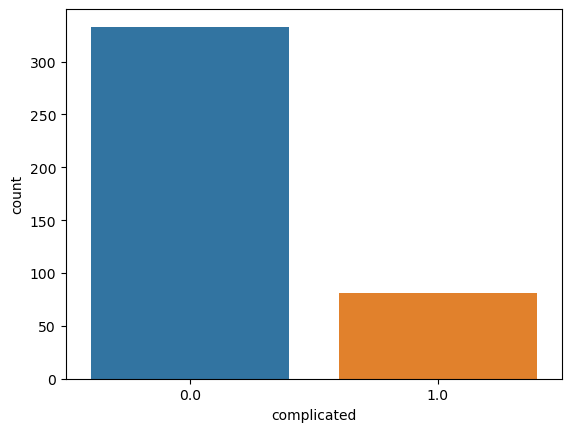

In [16]:
# visualize target class 
df['complicated'].value_counts()

sns.countplot(x='complicated', data=df);